In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# First Visualizations

In this first notebook we will take a first look at our word count over the years.

Let's import the data!

In [2]:
wordCountYear = pd.read_csv('Data/wordCountYear.csv',index_col=0)
wordCountYear.head()

,aaland,aalen,aap,aar,aarau,aarberg,aax,aay,ab,ab-intestat,...,îe,îes,îi,île,îles,îo,îoo,îr,îç,îî
1798-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
yearIndex = wordCountYear.index.values
print('Number of words : ',wordCountYear.shape[1])

Number of words :  32090


We have a lot of words that were taken into account. As we took 1000 words each month we learn from that several possible things about our dataset:
 1. We have a lot of words that were counted more than once due to : spelling mistakes, different spelling, words for each gender, plural singular etc..
 2. Word that appear and disappeau over time. If the word set evolves rapidly over time
 3. We still have a lot of words that are useless (We see that even after a little bit of cleaning we still have words such as  'aax', 'aap, 'îi' etc..)

There will be some work for cleaning.
 
First we can look a little bit at what is happening during one month. As we saw in the course, word distribution follows a Power Law, therefore we should find such a "long tail" distribtuion for word counts at any given year.

(0, 3000)

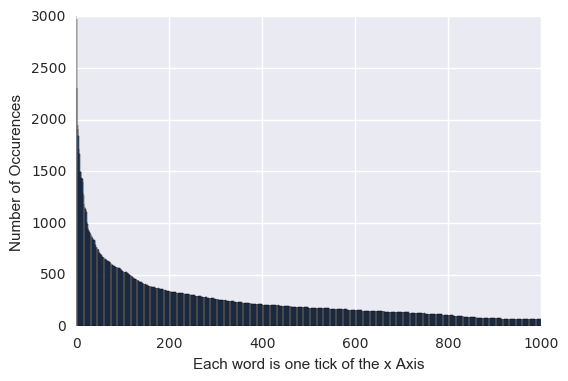

In [97]:
width = 0.7
totWords = 1000
numWords =len(wordCountYear.loc[yearIndex[1500]].sort_values(ascending=False).index[0:totWords])
plt.bar(np.arange(numWords),
        wordCountYear.loc[yearIndex[1500]].sort_values(ascending=False).values[0:totWords],width)
plt.ylabel('Number of Occurences')
plt.xlabel('Each word is one tick of the x Axis')
plt.ylim([0,3000])

As we can see, there are a few words that appear very often and the rest that appear much less.

Let's look at the time serie of one word. We try with week-end, as it's interesting to see when it appeared in Swiss romande newspapers!

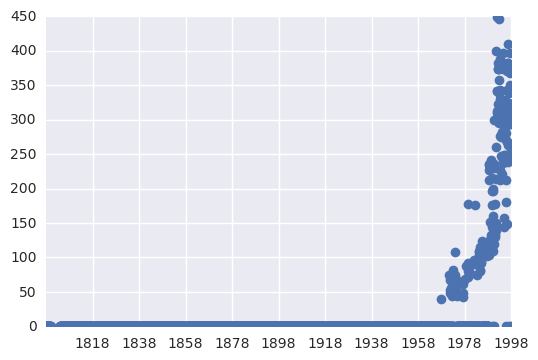

In [91]:
plt.plot_date(yearIndex,wordCountYear['week-end'].values)

It's interesting to see that before 1960 week-end was not used at all in swiss newspapers!

The first thing we remark from this plot is that we have not year normalised the data points. For now we have the numbre of times a word appears in a newspaper article in a given month, but as we will see below, the total number of words also increases over time in a given month.

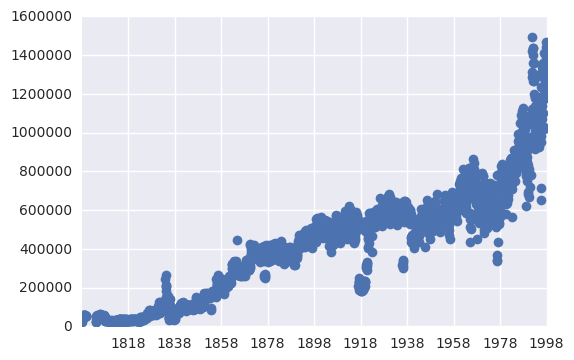

In [90]:
plt.plot_date(yearIndex,wordCountYear.sum(axis=1))

So to compare values between themselves we have to normalize each count by the total count in each month.

In [41]:
wordCountYear['Total Words'] = wordCountYear.sum(axis=1).values

In [42]:
wordNorm = wordCountYear.divide(wordCountYear['Total Words'],axis=0)

Now let's look again at the week-end time serie!

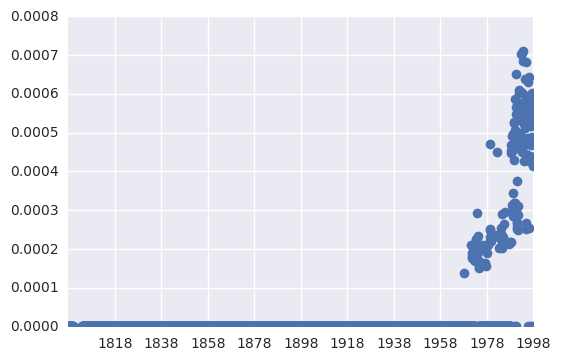

In [89]:
plt.plot_date(yearIndex,wordNorm['week-end'].values)

We see that even with normalization, the interest of week-ends increases over time!

Let's look at a periodic concept, such as Christmas!

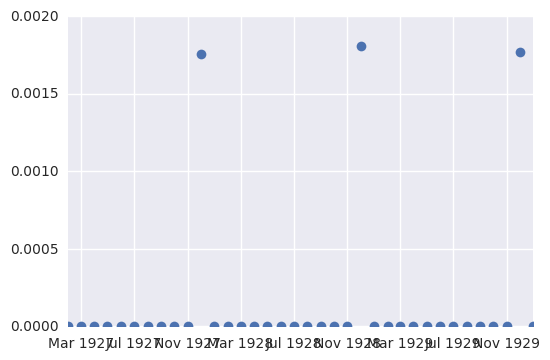

In [138]:
plt.plot_date(yearIndex[1500:1536],wordNorm['noël'].values[1500:1536])

As expected, newspapers only talk about christmas during december!

Now let's look at each december, do we talk about it more often over the years?

In [44]:
wordNorm.index = pd.to_datetime(wordNorm.index)

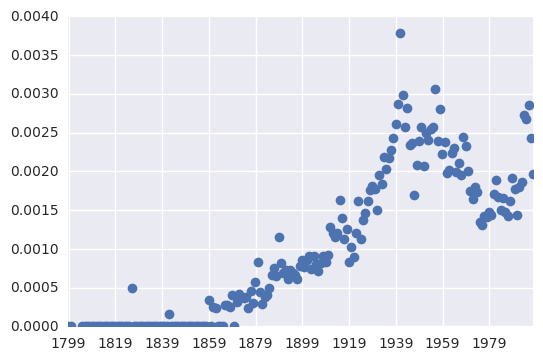

In [87]:
plt.plot_date(yearIndex[wordNorm.index.month==12],wordNorm['noël'].loc[wordNorm.index.month==12])

Suprisingly, we did not talk a lot about christmas before 1860! And then interest arose steadily over time with a peak around 1950!